In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [67]:
#data = {"32.058895,34.805781":[{"geometry":{"location":{"lat":32.0852999,"lng":34.78176759999999},"viewport":{"northeast":{"lat":32.146611,"lng":34.8519761},"southwest":{"lat":32.029252,"lng":34.7425159}}},"icon":"https://maps.gstatic.com/mapfiles/place_api/icons/geocode-71.png","name":"Tel Aviv-Yafo","photos":[{"height":1648,"html_attributions":["<a href=\"https://maps.google.com/maps/contrib/110771339807222144934\">Sticky sweet girl</a>"],"photo_reference":"CkQ0AAAAdapTCVcGxSXELYf0ItQjeYz2YYXsf8bPDIAME6QlXB24NN5XeFtYpYVUfWv4xS-y3OaF-dwuxb6H5D7c3AwIExIQ_okaFGhE4OI5HyM9vtMUQxoUx1LzhMW4_jGt0o_AsWGblRMpl9Y","width":2133}],"place_id":"ChIJH3w7GaZMHRURkD-WwKJy-8E","reference":"ChIJH3w7GaZMHRURkD-WwKJy-8E","scope":"GOOGLE","types":["locality","political"],"vicinity":"Tel Aviv-Yafo"},{"business_status":"OPERATIONAL","geometry":{"location":{"lat":32.0589857,"lng":34.8056766},"viewport":{"northeast":{"lat":32.0603346802915,"lng":34.8070255802915},"southwest":{"lat":32.0576367197085,"lng":34.8043276197085}}},"icon":"https://maps.gstatic.com/mapfiles/place_api/icons/generic_recreational-71.png","name":"Edith Wolfson Park","opening_hours":{"open_now":"true"},"photos":[{"height":2448,"html_attributions":["<a href=\"https://maps.google.com/maps/contrib/116110174678870103507\">Moran Ben Hur</a>"],"photo_reference":"CkQ0AAAAMK1bPevpqhgWKLsolhsC4PLRE3l-SyIMRucrLL6kDWIeC5OQ5tX2dlKABkvM6mujuD_ogtw3KeZfCNzTBcjYOxIQpBqEmFr-sV18D6LdnGuIsxoUWluDF2-e5WeQChXLY15aiPLPWdA","width":3264}],"place_id":"ChIJJ0kXzAhLHRURp3kHR9URrg4","plus_code":{"compound_code":"3R54+H7 Tel Aviv-Yafo, Israel","global_code":"8G4P3R54+H7"},"rating":4.4,"reference":"ChIJJ0kXzAhLHRURp3kHR9URrg4","scope":"GOOGLE","types":["park","tourist_attraction","point_of_interest","establishment"],"user_ratings_total":2839,"vicinity":"Tel Aviv-Yafo"}]}

Please enter coordinate list and radius in following format:
 - Coordinate list - lat,lon/lat,lon...
 - Radius = Positive number

In [69]:
print("Coordinate list - ")
coordinate_list = input()
print("Radius - ")
radius = input()
params = {"coordinate_list":coordinate_list,"radius":radius}

Coordinate list - 
32.058895,34.805781
Radius - 
100


In [70]:
data = requests.get("http://192.168.48.1:5000/api/circlesearcher",params)

In [71]:
data = data.json()
print(data)

{'32.058895,34.805781': [{'geometry': {'location': {'lat': 32.0852999, 'lng': 34.78176759999999}, 'viewport': {'northeast': {'lat': 32.146611, 'lng': 34.8519761}, 'southwest': {'lat': 32.029252, 'lng': 34.7425159}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/geocode-71.png', 'name': 'Tel Aviv-Yafo', 'photos': [{'height': 1648, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/110771339807222144934">Sticky sweet girl</a>'], 'photo_reference': 'CkQ0AAAAGE_8Q1bCEdigvslhgI5v-g8fhlXxrmEBJCPIF_y0GxwN0ZwbVoyLKFYe23zN09_hNiqS5Pc5kIr_lfqU6ww3lBIQhOATByl2a48pD4Ns0hQF4xoUwWI0EScA6fr0H_Vp2_P6pDe7m9g', 'width': 2133}], 'place_id': 'ChIJH3w7GaZMHRURkD-WwKJy-8E', 'reference': 'ChIJH3w7GaZMHRURkD-WwKJy-8E', 'scope': 'GOOGLE', 'types': ['locality', 'political'], 'vicinity': 'Tel Aviv-Yafo'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.0589857, 'lng': 34.8056766}, 'viewport': {'northeast': {'lat': 32.0603346802915, 'lng': 34.8070255802915}, 

Cell that makes a data 

In [72]:
data_frame_dict = {}
for coordinate in data:
    my_data = data[coordinate]
    name_list = []
    for location in my_data:
        name_list.append(location["name"])
        if not "rating" in location:
            location["rating"] = 0
            location["user_ratings_total"] = 0
    my_coordinate = pd.DataFrame(data[coordinate])
    #my_coordinate.index = name_list
    data_frame_dict[coordinate] = my_coordinate
my_coordinate

,geometry,icon,name,photos,place_id,reference,scope,types,vicinity,rating,user_ratings_total,business_status,opening_hours,plus_code
0,"{'location': {'lat': 32.0852999, 'lng': 34.781...",https://maps.gstatic.com/mapfiles/place_api/ic...,Tel Aviv-Yafo,"[{'height': 1648, 'html_attributions': ['<a hr...",ChIJH3w7GaZMHRURkD-WwKJy-8E,ChIJH3w7GaZMHRURkD-WwKJy-8E,GOOGLE,"[locality, political]",Tel Aviv-Yafo,0.0,0,NaN,NaN,NaN
1,"{'location': {'lat': 32.0589857, 'lng': 34.805...",https://maps.gstatic.com/mapfiles/place_api/ic...,Edith Wolfson Park,"[{'height': 2448, 'html_attributions': ['<a hr...",ChIJJ0kXzAhLHRURp3kHR9URrg4,ChIJJ0kXzAhLHRURp3kHR9URrg4,GOOGLE,"[park, tourist_attraction, point_of_interest, ...",Tel Aviv-Yafo,4.5,2838,OPERATIONAL,{'open_now': True},"{'compound_code': '3R54+H7 Tel Aviv-Yafo, Isra..."
2,"{'location': {'lat': 32.0594455, 'lng': 34.805...",https://maps.gstatic.com/mapfiles/place_api/ic...,כיכר לבנה,"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJ3TkqwQhLHRURjbNcvVS5B5c,ChIJ3TkqwQhLHRURjbNcvVS5B5c,GOOGLE,"[park, tourist_attraction, point_of_interest, ...","HaShalom Road 110, Tel Aviv-Yafo",4.5,386,OPERATIONAL,{'open_now': True},"{'compound_code': '3R54+Q7 Tel Aviv-Yafo, Isra..."


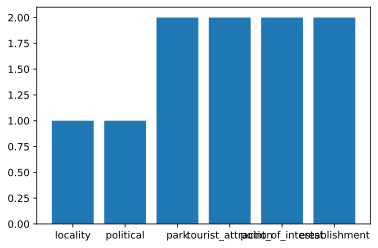

In [73]:
def calculate_type_ammounts(current_coordinate):
    types_dictionary = {}
    for types in current_coordinate["types"]:
        for current_type in types:
            if current_type in types_dictionary:
                types_dictionary[current_type] += 1
            else:
                types_dictionary[current_type] = 1
    return types_dictionary

def plot_types_dictionary(types_dictionary):
    type_list = types_dictionary.keys()
    ammounts = types_dictionary.values()
    plt.bar(type_list,ammounts)
    plt.show()
my_dict = calculate_type_ammounts(my_coordinate)
plot_types_dictionary(my_dict)
#type_ammounts = pd.DataFrame(calculate_type_ammounts(my_coordinate))


In [20]:
    #if "park" in my_coordinate.types:
    
    ammount_of_each_type = {}
    for place_type in types:
        ammount_of_each_type[place_type] = 0

    test = my_coordinate[my_coordinate["types"].apply(lambda x: any(t in x for t in types))]\
    #for index in my_coordinate.index:
    #    for type in types:
    #        if type in my_coordinate["types"][index]:
    #            ammount_of_each_type[type] +=1
    print(test)
    #type_df = pd.DataFrame(type_df)
    #type_df

NameError: name 'types' is not defined

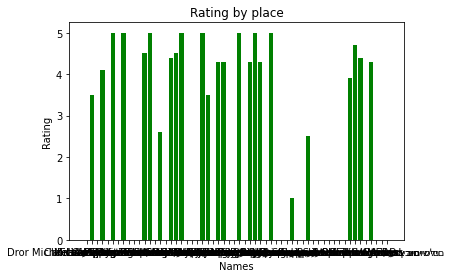

In [85]:
width = 0.3

plt.bar(my_coordinate.name,my_coordinate.rating,color = 'green', label = "Rating")
plt.title("Rating by place")
plt.xlabel("Names")
plt.ylabel("Rating")
plt.show()

In [67]:
import numpy as np
np.arange(5)

array([0, 1, 2, 3, 4])